In [ ]:
import pandas as pd

In [74]:
data = pd.read_csv('dataset_mibiciudad.csv')

In [ ]:
data.head()

,cantidad_de_viajes,distancia_recorrida_sum,duracion_del_viaje,hora,estacion_inicio,fecha,metrica_co2
0,5,338,25,14,"80.0359, -21.35116",26-07-19,415
1,8,631,15,22,"-30.37826, -22.73825",21-12-19,544
2,10,549,18,6,"32.44255, 20.18359",30-09-19,600
3,9,794,13,21,"77.98594, 125.93963",13-08-20,426
4,4,809,19,22,"58.0718, -156.96122",19-11-20,529


In [ ]:
data.describe()

,cantidad_de_viajes,distancia_recorrida_sum,duracion_del_viaje,hora,metrica_co2
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.740000,553.710000,20.120000,12.290000,445.790000
std,2.783864,249.528173,6.022315,6.959181,88.316384
min,1.000000,125.000000,10.000000,0.000000,300.000000
25%,4.000000,332.250000,14.000000,6.000000,360.250000
50%,5.000000,539.000000,20.000000,13.000000,439.000000
75%,8.000000,757.750000,25.000000,19.000000,525.750000
max,10.000000,995.000000,30.000000,24.000000,600.000000


In [75]:
#remove non useful columns, 'estacion_inicio', 'fecha'
#'cantidad_de_viajes', 'distancia_recorrida_sum', 'duracion_del_viaje', 'hora' are the features
#'metrica_co2' is the label
features = data[['cantidad_de_viajes', 'distancia_recorrida_sum', 'duracion_del_viaje','hora']]
label = data[['metrica_co2']]

In [ ]:
data.head()

,cantidad_de_viajes,distancia_recorrida_sum,duracion_del_viaje,hora,estacion_inicio,fecha,metrica_co2
0,5,338,25,14,"80.0359, -21.35116",26-07-19,415
1,8,631,15,22,"-30.37826, -22.73825",21-12-19,544
2,10,549,18,6,"32.44255, 20.18359",30-09-19,600
3,9,794,13,21,"77.98594, 125.93963",13-08-20,426
4,4,809,19,22,"58.0718, -156.96122",19-11-20,529


In [ ]:
features.head()

,cantidad_de_viajes,distancia_recorrida_sum,duracion_del_viaje,hora
0,5,338,25,14
1,8,631,15,22
2,10,549,18,6
3,9,794,13,21
4,4,809,19,22


In [ ]:
label.head()

,metrica_co2
0,415
1,544
2,600
3,426
4,529


In [76]:
#OPTIONAL scale numerical features, not the label
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features[features.columns] = scaler.fit_transform(features[features.columns])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [77]:
features.head()

,cantidad_de_viajes,distancia_recorrida_sum,duracion_del_viaje,hora
0,0.444444,0.244828,0.75,0.583333
1,0.777778,0.581609,0.25,0.916667
2,1.000000,0.487356,0.40,0.250000
3,0.888889,0.768966,0.15,0.875000
4,0.333333,0.786207,0.45,0.916667


In [78]:
data_set = features
data_set['label'] = label
data_set.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cantidad_de_viajes,distancia_recorrida_sum,duracion_del_viaje,hora,label
0,0.444444,0.244828,0.75,0.583333,415
1,0.777778,0.581609,0.25,0.916667,544
2,1.000000,0.487356,0.40,0.250000,600
3,0.888889,0.768966,0.15,0.875000,426
4,0.333333,0.786207,0.45,0.916667,529


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_set, test_size=0.2)

test.sort_values(by='cantidad_de_viajes', ascending=True, inplace=True) #just for visualization purposes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train.drop('label', axis=1), train['label'])

# Make predictions using the testing set
y_pred = regr.predict(test.drop('label', axis=1))

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test['label'], y_pred)) #y_hat
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test['label'], y_pred))

Coefficients: 
 [-2.98256257 -0.06066308  0.16581334 -2.60380958]
Mean squared error: 5483.62
Coefficient of determination: 0.10


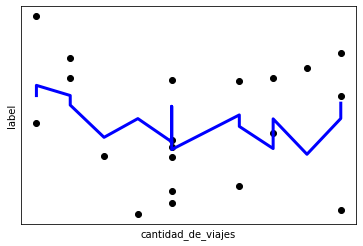

In [ ]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(test['cantidad_de_viajes'], test['label'],  color='black')
plt.plot(test['cantidad_de_viajes'], y_pred , color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('cantidad_de_viajes')
plt.ylabel('label')
plt.show()

In [ ]:
test = test.sort_index(axis = 0) 

In [ ]:
#new prediction
y_pred = regr.predict(test.drop('label', axis=1))

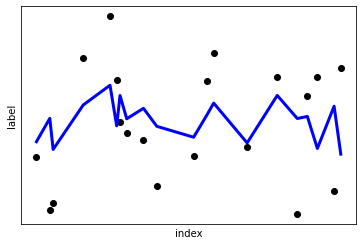

In [ ]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(test.index, test['label'],  color='black')
plt.plot(test.index, y_pred , color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('index')
plt.ylabel('label')
plt.show()